# Analisis estadistico

# Liberias y DFs

In [25]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import zepid
from zepid.graphics import EffectMeasurePlot
import networkx as nx
from numpy import genfromtxt
from scipy import stats

#Creación de data frames a usar
df_metadata = pd.read_csv('..\data\cleaned\Tabla Normalizada - Metadata.csv')
df_data_type = pd.read_csv('..\data\cleaned\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('..\data\cleaned\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('..\data\cleaned\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('..\data\cleaned\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('..\data\cleaned\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('..\data\cleaned\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('..\data\cleaned\Tabla Normalizada - Performances.csv')
df_alg_perf = pd.read_csv('..\data\cleaned\Tabla Normalizada - Alg_Perf.csv')

# Set características generales de los gráficos

In [26]:
plt.rcParams['figure.figsize'] = [20, 10]

sns.set_style("whitegrid")
sns.set_palette('colorblind')

plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

# Funciones
* multi_reversing = para casos donde un dato toma mas de valor, o en casos tipicos de one hot encoding (un dato toma un solo valor)
* multi_reversing_n = mismo que el anterior, pero para numeros distintos de cero


In [27]:
def multi_reversing(df,col_id, col_values):
    """la funcion toma nos da la frecuencia de los datos distribuidos en distintas columnas.
    Toma una variable distribuida en varias columnas (one hot encoding), y aplica la funcion melt para cambiar el formato
    de la tabla a long. Luego devuelve una columna donde aparece el nombre de cada columna, la cantidad de veces que fue
    marcada con una 'x' (si accuracy fue marcada 50 veces, aparecera el str 'accuracy' 50 veces, lo que permite graficar su frecuencia
    de aparicion)

    Args:
        df (dataframe): dataframe con el que se desea trabajar, debe poseer las columnas de id_vars y list_value_vars
        in_id_vars (str): nombre de la columna que se usa como identificador de variables 
        value_vars (str o lista): str o lista con el nombre de las columnas de las cuales se desea obtener los datos (se puede
        obviamente subsetear (p.e. dataframe.iloc['columna_1',...,columna_n']))

    Returns:
        dataframe: _description_
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    """exactamente lo mismo que multi_reversing, solo que para casos donde lo que se busca es un numero y no una x
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

def bar_plot(col, data, titulos):
    var_x = col
    df = data
    g = sns.countplot(x=var_x, data=df, order = getattr(df, var_x).value_counts().index)
    g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
    plt.xticks(rotation=90)
    plt.show()

def t_student(x,y):
	print('Students t-test')
	from scipy.stats import ttest_ind

	stat, p = ttest_ind(x, y)
	print('stat=%.3f, p=%.3f' % (stat, p))

    

	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')

def mann_whitney_u(x,y):
	print('Mann-Whitney U Test')
	from scipy.stats import mannwhitneyu
	stat, p = mannwhitneyu(x, y, alternative = 'greater')
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably the same distribution')
	else:
		print('Probably different distributions')

# Gráficos

## 2. Análisis estadístico 
1. Subsetear par quedarse solo con modelso de “HV,LV” (y “LV, “HV”), y “HA,LA” (y “LA, “HA”).
2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.
3. Agrupar  por paper y sacar la media de la performance (para que quede paper un unico valor de performance promedio de valencia, y un unico valor de performance promedio de arousal. Esto es fundamental para los pasos que siguen)
4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.
5. Hacer T test INTRASUJETO

In [28]:
#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_alg_perf = df_alg_perf.fillna(0)
df = df_alg_perf
df = df[df['affective_model'] == 'dimensional']
df = df[df['is_classifier'].isin(['x', 'X'])]
df = df[df['class_model_output_categories'].isin(['HA, LA', 'HV, LV', 'LA, HA', 'LV, HV'])]
df[['class_model_output_categories']] = df[['class_model_output_categories']].replace(['LA, HA', 'LV, HV'], ['HA, LA', 'HV, LV' ])


In [29]:
df[["paper_id", "apa_citation", "class_model_output_categories"]]

,paper_id,apa_citation,class_model_output_categories
2,3.0,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HA, LA"
3,3.0,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HV, LV"
44,11.0,"Girardi, D., Lanubile, F., & Novielli, N. (201...","HA, LA"
45,11.0,"Girardi, D., Lanubile, F., & Novielli, N. (201...","HV, LV"
129,20.0,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...","HA, LA"
...,...,...,...
493,98.0,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...","HV, LV"
494,99.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HV, LV"
495,99.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HV, LV"
496,99.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HA, LA"


2. FIltrar para quedarnos unicamente con papers que tengan tanto valencia Y arousal (al querer hacer modelos “intrasujeto” es imporatne que se cumpla con esta condición.

In [30]:
"""revision a mano de los modelos
vuela el paper_id 24, 37, 66, 97
porque no contenian modelos tanto para arousal como para valencia
se procede a filtrarlos"""

df.drop(df[ df['paper_id'] == 24].index,inplace = True)
df.drop(df[ df['paper_id'] == 37].index,inplace = True)
df.drop(df[ df['paper_id'] == 66].index,inplace = True)
df.drop(df[ df['paper_id'] == 97].index,inplace = True)

In [31]:
df_excel = df
df_excel.to_excel("..\data\cleaned\\analisis_estadistico.xlsx")

In [32]:
df.iloc[:,57:]

,accuracy,precision,f-measure,recall-sensitivity-true_positive_rate,specificity_true-negative-rate,false-positive-rate,false-negative-rate,roc-auc,R2,R,MAE-(Mean-Absolute-Error),Concordance-Correlation-Coefficient-(CCC),Spearman’s-ranking-correlation,Mean-square-error-(MSE),Root-Mean-Square-Error-(RMSE),Pearson-Correlation Coefficient-(r),unweighted-average-recall-(UAR),Matthews-Correlation-Coefficient,G-mean-(Geometric-mean)
2,71.53,-,-,-,-,-,0,-,-,0,-,0,0,0,0,0,0,0,0.0
3,71.04,-,-,-,-,0,0,-,-,0,-,0,0,0,0,0,0,0,0.0
44,-,67,63,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
45,-,58,35,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
129,62.23,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,68.75,45.41,50,55.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
494,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
495,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
496,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [33]:
df[["paper_id", "model_id", "apa_citation", "class_model_output_categories"]]

,paper_id,model_id,apa_citation,class_model_output_categories
2,3.0,3.0,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HA, LA"
3,3.0,4.0,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HV, LV"
44,11.0,45.0,"Girardi, D., Lanubile, F., & Novielli, N. (201...","HA, LA"
45,11.0,46.0,"Girardi, D., Lanubile, F., & Novielli, N. (201...","HV, LV"
129,20.0,130.0,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...","HA, LA"
...,...,...,...,...
493,98.0,494.0,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...","HV, LV"
494,99.0,495.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HV, LV"
495,99.0,496.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HV, LV"
496,99.0,497.0,"Subramanian, R., Wache, J., Abadi, M. K., Vier...","HA, LA"


3. Agrupar  por paper y sacar la media de la performance (para que quede paper un unico valor de performance promedio de valencia, y un unico valor de performance promedio de arousal. Esto es fundamental para los pasos que siguen)

In [34]:
"""
se calcula a mano los promedios de arousal y valencia para cada paper
"""
df2 = pd.read_excel("..\data\cleaned\\Libro12.xlsx") 
df2.head()


,paper_id,apa_citation,year,affective_model,class_model_output_categories,accuracy,precision,f0measure,recall0sensitivity0true_positive_rate,specificity_true0negative0rate,...,R,MAE0(Mean0Absolute0Error),Concordance0Correlation0Coefficient0(CCC),Spearman’s0ranking0correlation,Mean0square0error0(MSE),Root0Mean0Square0Error0(RMSE),Pearson0Correlation Coefficient0(r),unweighted0average0recall0(UAR),Matthews0Correlation0Coefficient,G0mean0(Geometric0mean)
0,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,dimensional,"HA, LA",71.53,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,dimensional,"HV, LV",71.04,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,11,"Girardi, D., Lanubile, F., & Novielli, N. (201...",2018,dimensional,"HA, LA",0.00,67.0,63.0,64.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,11,"Girardi, D., Lanubile, F., & Novielli, N. (201...",2018,dimensional,"HV, LV",0.00,58.0,35.0,50.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2017,dimensional,"HA, LA",62.23,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


4. Recien ahora (y  no antes, esto es mucho muy importante) analizar cual es la medida de performance mas prevalente y subsetear para quedarnos solo con esa medida.

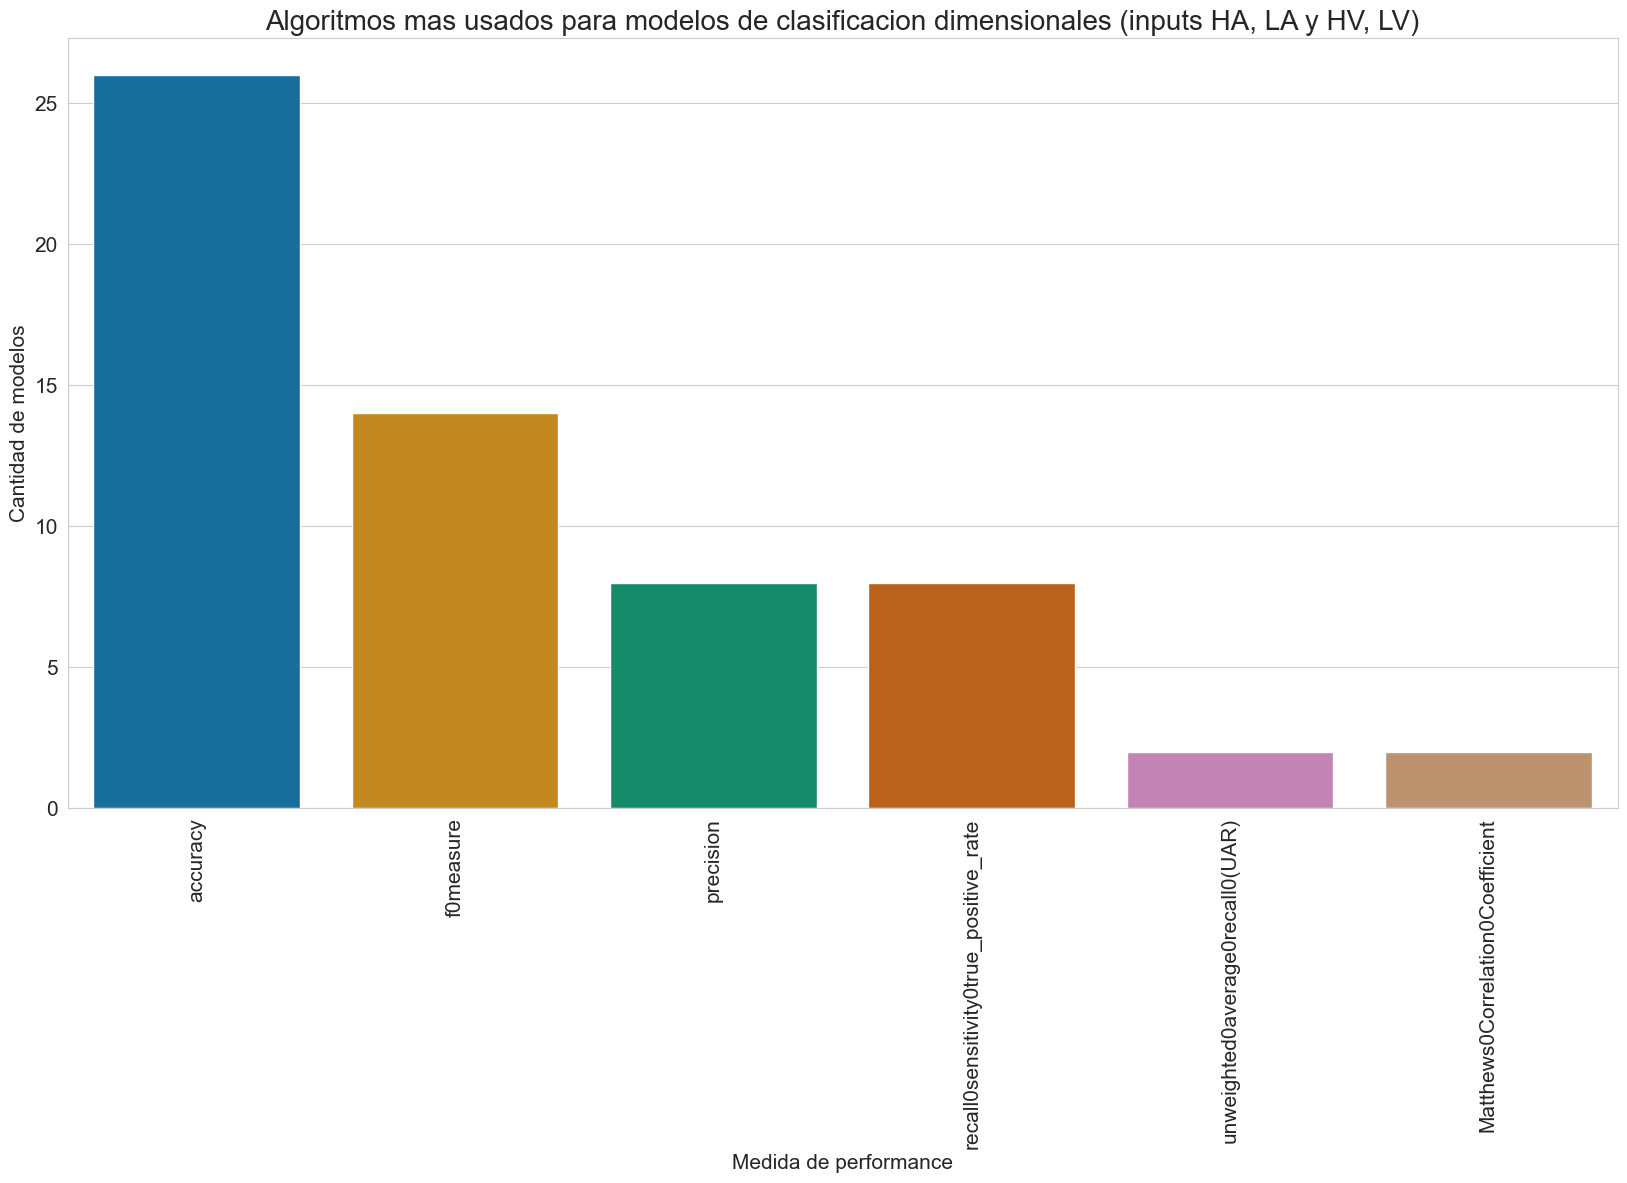

In [35]:
df_performance_medidas = multi_reversing_n(df2, 'paper_id',df2.iloc[:,5:])
titulos = ['Algoritmos mas usados para modelos de clasificacion dimensionales (inputs HA, LA y HV, LV)', 'Medida de performance', 'Cantidad de modelos']
bar_plot('variable',df_performance_medidas,titulos)

In [36]:
#filtramos por accuracy
df2 = df2.fillna('-')
df2 = df2[(df2['accuracy'] != '-') & (df2['accuracy'] != 0)]

In [37]:
df2[["paper_id", "apa_citation", "class_model_output_categories", "accuracy"]]

,paper_id,apa_citation,class_model_output_categories,accuracy
0,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HA, LA",71.53
1,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...","HV, LV",71.04
4,20,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...","HA, LA",62.23
5,20,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...","HV, LV",55.78
6,23,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...","HA, LA",71.53
7,23,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...","HV, LV",71.04
10,32,"Siddharth, null, Jung, T.-P., & Sejnowski, T....","HA, LA",64.84
11,32,"Siddharth, null, Jung, T.-P., & Sejnowski, T....","HV, LV",63.28
12,38,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...","HA, LA",50.54
13,38,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...","HV, LV",65.33


In [38]:
#creamos df para el analisis estadistico
df_3 = df2[["class_model_output_categories","accuracy"]]
df_3

,class_model_output_categories,accuracy
0,"HA, LA",71.53
1,"HV, LV",71.04
4,"HA, LA",62.23
5,"HV, LV",55.78
6,"HA, LA",71.53
7,"HV, LV",71.04
10,"HA, LA",64.84
11,"HV, LV",63.28
12,"HA, LA",50.54
13,"HV, LV",65.33


Aplicamos los estadísticos

obtenido de: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [39]:
#creacion lista con la performance para arousal y valence
df_arousal = df_3[df_3['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['accuracy']
arousal1 = df_arousal.values.tolist()
arousal1 = list(map(float, arousal1))

df_valence = df_3[df_3['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['accuracy']
valence1 = df_valence.values.tolist()
valence1 = list(map(float, valence1))

p1 = stats.ttest_rel(arousal1, valence1, alternative = "greater")

print(p1)

#Test parametrico - t de student
#t_student(arousal1, valence1)

#Test no parametrico - U de Mann-Whitney
#mann_whitney_u(arousal1, valence1)


Ttest_relResult(statistic=0.35229084656919984, pvalue=0.3653649152631109)


## 4. Graficos boxplot

1. Hacer un plots para ver como cambia la performance promedio (accuracy) en general con el paso del tiempo.  Esto lo resolveria con un box plot por año de accuracy. Donde en el eje X este de 2010 a 2020, y en el eje Y este el accuracy. Con este plot podriamos analizar si efectivamente mejora la performance de los modelos predictivos con el paso del tiempo

creacion df para el plot, con el anio las dimensiones y a performance

In [40]:
performances_av = df2[["year", "class_model_output_categories", "accuracy"]]
#reemplazos
performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)

performances_av

C:\Users\someo\AppData\Local\Temp\ipykernel_57324\1501514481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av[['class_model_output_categories']] = performances_av[['class_model_output_categories']].replace(['HA, LA', 'HV, LV' ], ['arousal', 'valence' ])
C:\Users\someo\AppData\Local\Temp\ipykernel_57324\1501514481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performances_av.rename(columns = {'class_model_output_categories':'dimension', 'accuracy':'performance'}, inplace = True)


,year,dimension,performance
0,2018,arousal,71.53
1,2018,valence,71.04
4,2017,arousal,62.23
5,2017,valence,55.78
6,2017,arousal,71.53
7,2017,valence,71.04
10,2018,arousal,64.84
11,2018,valence,63.28
12,2017,arousal,50.54
13,2017,valence,65.33


[Text(0.5, 1.0, 'Comparación de medidas de performance por anio')]

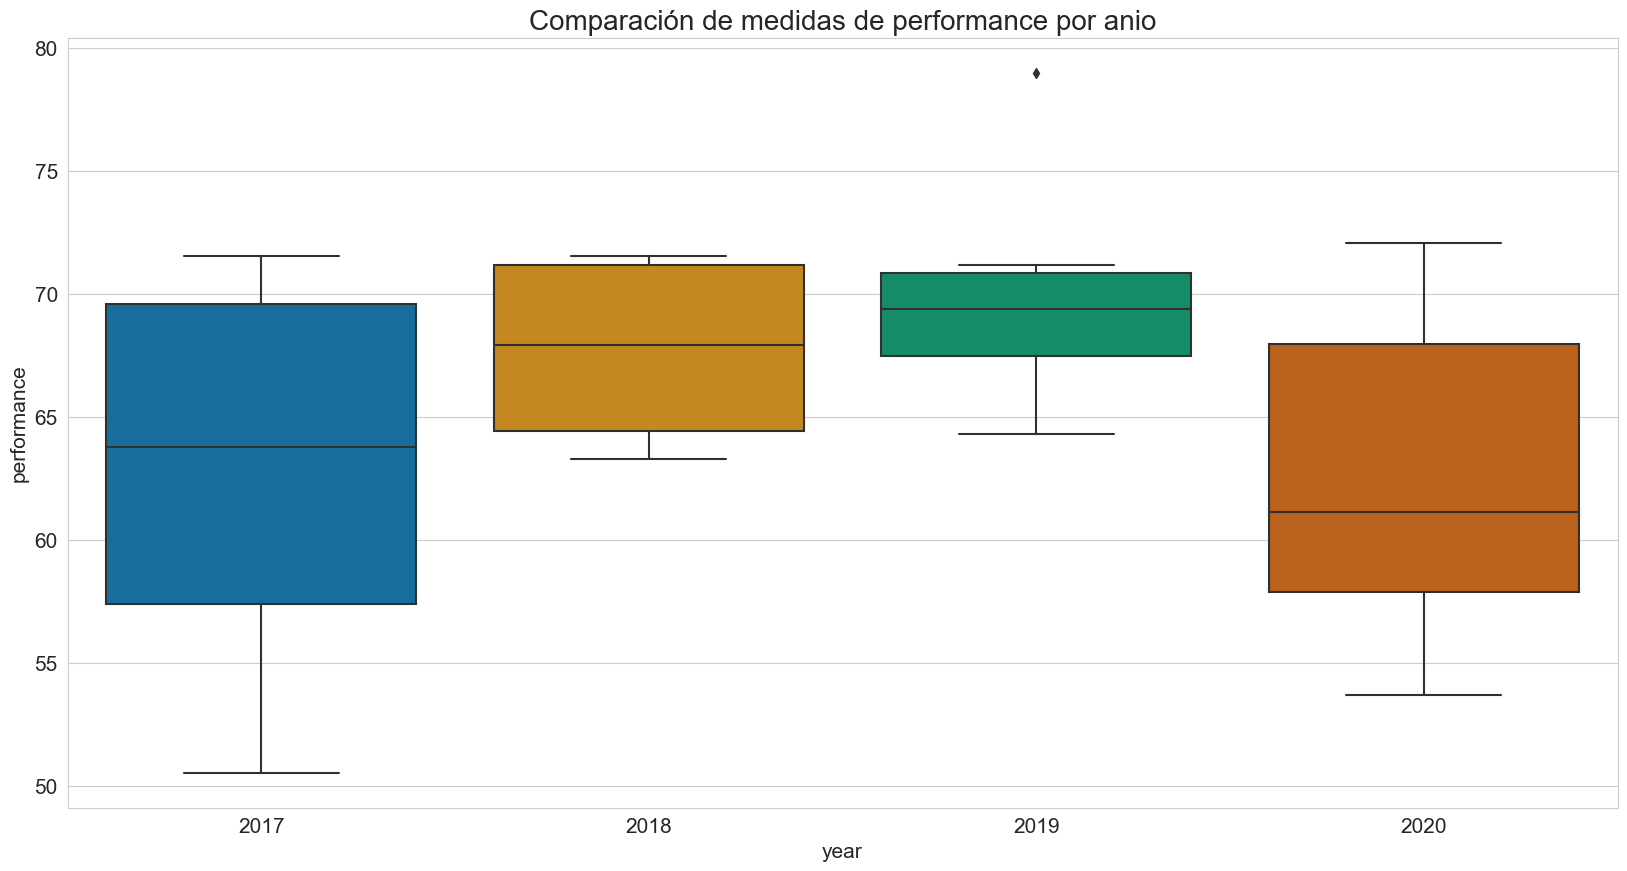

In [41]:
g = sns.boxplot(y="performance", x="year", data=performances_av)
g.set(title = 'Comparación de medidas de performance por anio')

1.bis. subsjetear esta progresion de accuracies pero por dimension afectiva: hacer un plot (conjunto de boxplots de 2010 a 2020) de valencia y otro plot (conjunto de boxplots de 2010 a 2020) de arousal. Este plot nos ayudaría a ver si cambia la progresion de accuracies dependiendo cada dimension afectiva

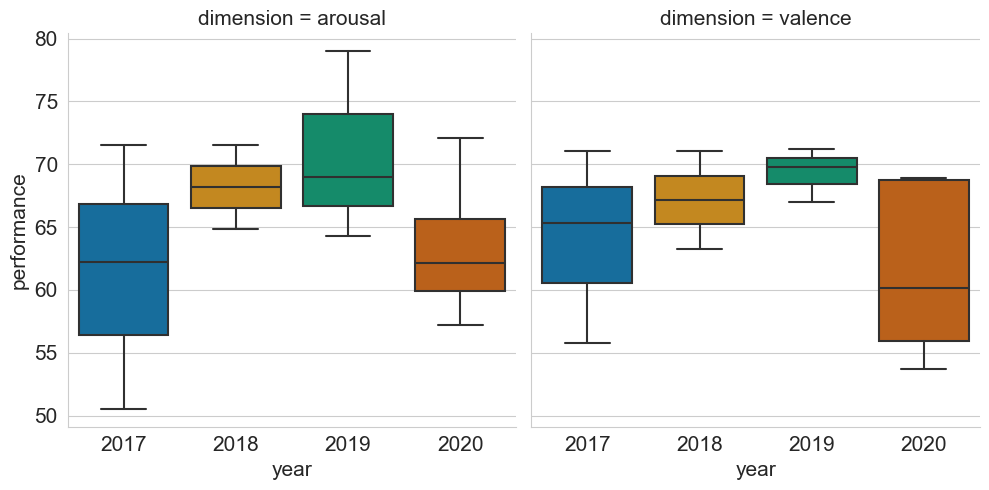

In [42]:
g = sns.catplot(x="year", y="performance", col =  "dimension", data=performances_av, kind="box")

## Cantidad de modelos de regresion o categorial por anio

2. Hacer un plot de la progresión de modelos de regresión vs clasificación de 2010 a 2020. Este plot deberia ser igual al plot que ve la progresion de modelos dimensioanles vs categoriales. La idea con este plot seria analizar sin la progresion de papers basados en modelos dimensioanels se acompaña con modelso estadísticos de regresion (que es lo que se esperaria dado el tipo de variable, pero asumimos que no sucede)

In [43]:
def label_model (row):
   if row['is_classifier'] == "x" :
      return 'classifier'
   if row['is_regressor'] == "x" :
      return 'regressor'
   return 'Other'

In [44]:
df_statistical_learning_models['model']  = df_statistical_learning_models.apply(lambda row: label_model(row), axis=1)

In [45]:
df_statistical_learning_models['model'].value_counts()

classifier    455
regressor      46
Name: model, dtype: int64

In [46]:
df_models = df_statistical_learning_models[["apa_citation",'model', "year", "model_id"]]

In [47]:
df_models[df_models['model'].isin(['Other'])]

,apa_citation,model,year,model_id


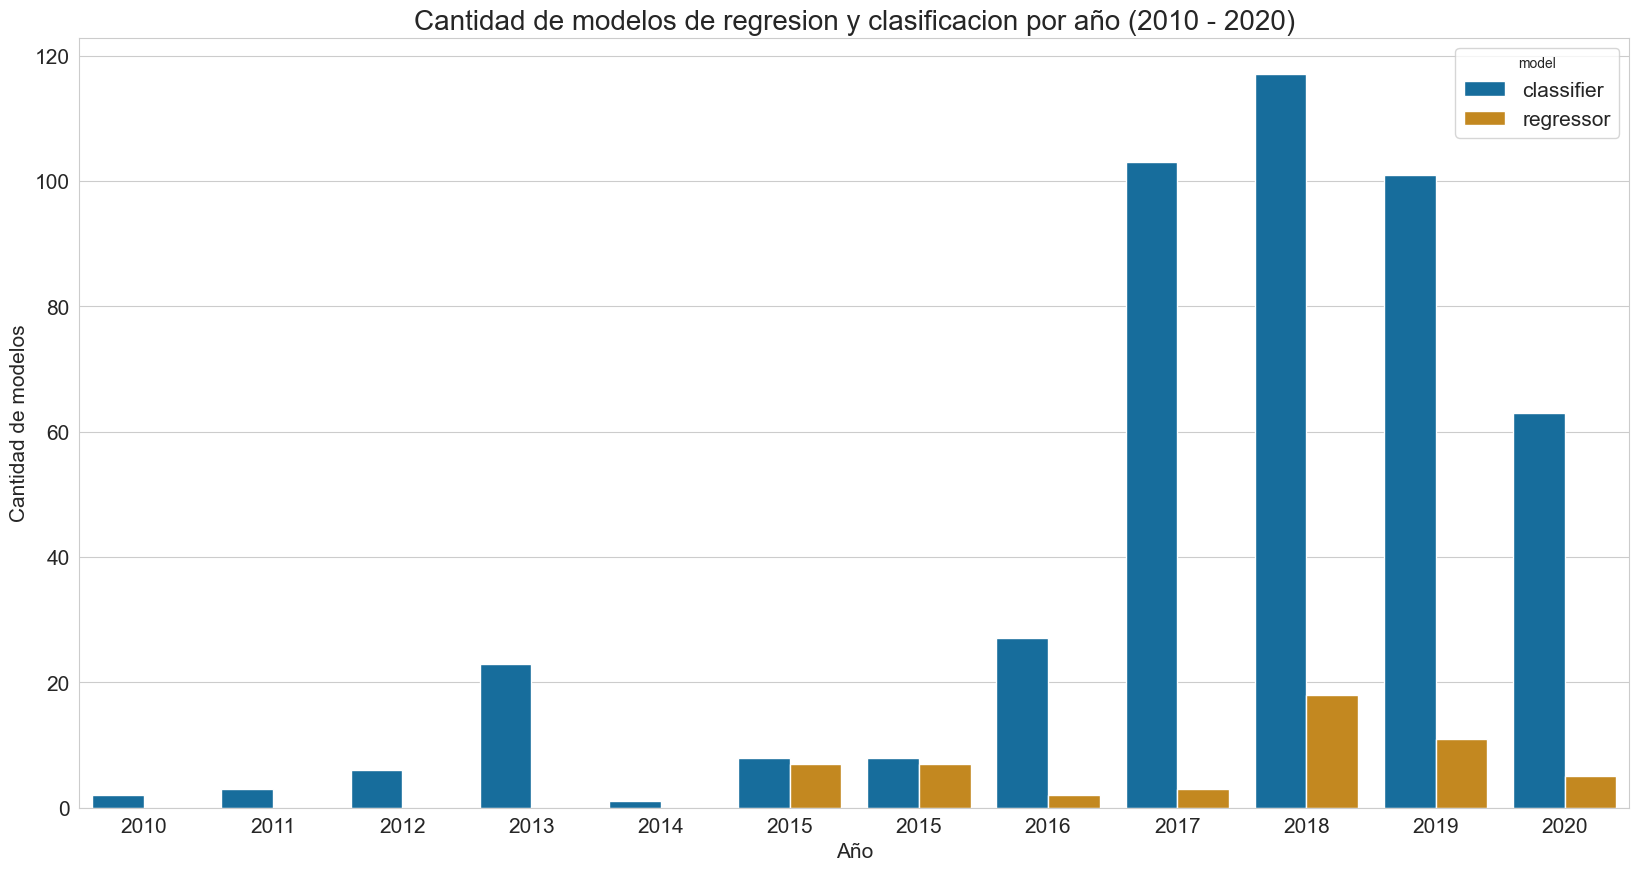

In [48]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(title = 'Cantidad de modelos de regresion y clasificacion por año (2010 - 2020)', xlabel = 'Año', ylabel = 'Cantidad de modelos')
plt.show()